In [1]:
import re
import numpy as np
import pandas as pd

In [2]:
df_raw = pd.read_csv('assets/dataset.csv')

C:\Users\IsmailKaraman\AppData\Local\Temp\ipykernel_11008\3127177488.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv('assets/dataset.csv')


In [3]:
df_raw.head()

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,...,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,g10001637-d10002227,Le 147,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",45.961674,1.169131,...,2.0,0.0,0.0,0.0,0.0,4.0,4.5,4.0,NaN,NaN
1,g10001637-d14975787,Le Saint Jouvent,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",45.957040,1.205480,...,2.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,g10002858-d4586832,Au Bout du Pont,"[""Europe"", ""France"", ""Centre-Val de Loire"", ""B...",France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",46.635895,1.386133,...,3.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,g10002986-d3510044,Le Relais de Naiade,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Co...",France,Nouvelle-Aquitaine,Correze,Lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",45.642610,1.824460,...,1.0,0.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN
4,g10022428-d9767191,Relais Du MontSeigne,"[""Europe"", ""France"", ""Occitanie"", ""Aveyron"", ""...",France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",44.208860,2.960470,...,4.0,7.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN


In [4]:
df_raw.shape

(1083397, 42)

In [5]:
df_raw.describe()

,latitude,longitude,open_days_per_week,open_hours_per_week,working_shifts_per_week,avg_rating,total_reviews_count,reviews_count_in_default_language,excellent,very_good,average,poor,terrible,food,service,value,atmosphere
count,1.067607e+06,1.067607e+06,593832.000000,593832.000000,593832.000000,986761.000000,1.031162e+06,988204.000000,988204.000000,988204.000000,988204.000000,988204.000000,988204.000000,599325.000000,604287.000000,602692.000000,261785.000000
mean,4.656718e+01,5.838040e+00,6.327081,62.023282,7.630754,4.035943,1.028890e+02,44.563415,24.653440,10.490516,4.109302,2.355306,2.954850,4.104179,4.067245,3.982897,3.933682
std,5.882611e+00,8.639410e+00,0.966734,30.538134,2.550128,0.713694,2.672415e+02,148.728179,89.850801,35.512256,15.669631,9.352756,11.030069,0.564208,0.581267,0.577605,0.555262
min,2.764031e+01,-7.121809e+01,1.000000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,4.190986e+01,-8.027315e-01,6.000000,39.000000,6.000000,3.500000,6.000000e+00,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,3.500000,3.500000
50%,4.658510e+01,5.646530e+00,7.000000,58.500000,7.000000,4.000000,2.400000e+01,7.000000,3.000000,2.000000,1.000000,0.000000,0.000000,4.000000,4.000000,4.000000,4.000000
75%,5.140537e+01,1.223767e+01,7.000000,81.500000,7.000000,4.500000,9.300000e+01,26.000000,13.000000,6.000000,2.000000,1.000000,2.000000,4.500000,4.500000,4.500000,4.500000
max,6.994156e+01,3.336942e+01,7.000000,168.000000,15.000000,5.000000,5.240400e+04,15229.000000,9383.000000,4091.000000,2132.000000,1253.000000,1215.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083397 entries, 0 to 1083396
Data columns (total 42 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   restaurant_link                    1083397 non-null  object 
 1   restaurant_name                    1083397 non-null  object 
 2   original_location                  1083397 non-null  object 
 3   country                            1083397 non-null  object 
 4   region                             1033074 non-null  object 
 5   province                           742765 non-null   object 
 6   city                               682712 non-null   object 
 7   address                            1083397 non-null  object 
 8   latitude                           1067607 non-null  float64
 9   longitude                          1067607 non-null  float64
 10  claimed                            1081555 non-null  object 
 11  awards                  

In [7]:
# convert columns to inferred types
df = df_raw.convert_dtypes()
# ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.convert_dtypes.html

## summary analysis for columns

Creating a summary dataframe for columns to understand them
- A custom summary for everything, no need for external libraries and repetive calling of special methods.
- I find usefull when the number of columns is high.

#### helper functions

In [8]:
def find_col_type(x):
    if x in ['Float64', 'Int64']:
        return 'numerical'
    elif x in ['string']:
        return 'text'
    else:
        return 'other'

In [9]:
col_analysis = df.describe(include='all').T
# inferred column types
col_analysis['col_dtypes'] = df.dtypes.values
# finding col types numerical, text, or other depending on the column dtypes    
col_analysis['col_types'] = col_analysis['col_dtypes'].apply(find_col_type)
# # of null values
col_analysis['num_of_nulls'] = df.isna().sum().values
# percentage of null values
col_analysis['perc_of_nulls'] = col_analysis['num_of_nulls']/df.shape[0]*100

In [10]:
numerical_cols = col_analysis.loc[col_analysis['col_types']=='numerical'].index
text_cols = col_analysis.loc[col_analysis['col_types']=='text'].index

In [11]:
col_analysis

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,col_dtypes,col_types,num_of_nulls,perc_of_nulls
restaurant_link,1083397,1083397,g10001637-d10002227,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,string,text,0,0.000000
restaurant_name,1083397,840914,Subway,4881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,string,text,0,0.000000
original_location,1083397,65997,"[""Europe"", ""United Kingdom (UK)"", ""England"", ""...",22942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,string,text,0,0.000000
country,1083397,24,Italy,224763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,string,text,0,0.000000
region,1033074,250,Lombardy,33097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,string,text,50323,4.644927
province,742765,1333,Province of Barcelona,18952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,string,text,340632,31.441106
city,682712,43495,Paris,18129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,string,text,400685,36.984134
address,1083397,1034685,Greece,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,string,text,0,0.000000
latitude,1067607.0,NaN,NaN,NaN,46.567182,5.882611,27.64031,41.90986,46.5851,51.405367,69.94156,Float64,numerical,15790,1.457453
longitude,1067607.0,NaN,NaN,NaN,5.83804,8.63941,-71.218094,-0.802732,5.64653,12.237675,33.369423,Float64,numerical,15790,1.457453


# Data cleaning

### 1.Identify the columns with mixed data types.

In [12]:
# converting columns to inferred types
df = df_raw.convert_dtypes()
# ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.convert_dtypes.html

In [13]:
# I use convert_dtypes function to infer types because in default pandas treats null values as float
# after converting dtypes to inferred types they will be treated as NAType
print(df_raw.loc[15, 'total_reviews_count'])
print(type(df_raw.loc[15, 'total_reviews_count']))
print(type(df.loc[15, 'total_reviews_count']))

nan
<class 'numpy.float64'>
<class 'pandas._libs.missing.NAType'>


In [14]:
# finding columns that includes more than one different data type
mixed_type_cols = []
all_mixed_types = []
print('\033[1m'+'Type Counts - Col name - Types - Inferred Types'+'\033[0m')
for col in df_raw.columns:
    type_count = df[col].apply(type).nunique()
    all_mixed_types.extend(df[col].apply(type).unique())
    if type_count > 1:
        print(f"{type_count} - {col}  -  {df_raw[col].apply(type).unique()} - {df[col].apply(type).unique()}")
        mixed_type_cols.append(col)

Type Counts - Col name - Types - Inferred Types
2 - region  -  [<class 'str'> <class 'float'>] - [<class 'str'> <class 'pandas._libs.missing.NAType'>]
2 - province  -  [<class 'str'> <class 'float'>] - [<class 'str'> <class 'pandas._libs.missing.NAType'>]
2 - city  -  [<class 'str'> <class 'float'>] - [<class 'str'> <class 'pandas._libs.missing.NAType'>]
2 - latitude  -  [<class 'float'>] - [<class 'float'> <class 'pandas._libs.missing.NAType'>]
2 - longitude  -  [<class 'float'>] - [<class 'float'> <class 'pandas._libs.missing.NAType'>]
2 - claimed  -  [<class 'str'> <class 'float'>] - [<class 'str'> <class 'pandas._libs.missing.NAType'>]
2 - awards  -  [<class 'float'> <class 'str'>] - [<class 'pandas._libs.missing.NAType'> <class 'str'>]
2 - popularity_detailed  -  [<class 'str'> <class 'float'>] - [<class 'str'> <class 'pandas._libs.missing.NAType'>]
2 - popularity_generic  -  [<class 'str'> <class 'float'>] - [<class 'str'> <class 'pandas._libs.missing.NAType'>]
2 - top_tags  -  [

In [15]:
# all unique mixed types
set(all_mixed_types)

{float, int, pandas._libs.missing.NAType, str}

We can see that most of the columns have 2 different data types. When we look at these types, one of the types is always pandas._libs.missing.NAType which corresponds to Null values.  
This means that some columns have null values and pandas treat them as float. 
If we do not infer types, here, we may miss float columns as mixed types.  

### 2.For each column, count the number of rows per data type.

In [16]:
# printing the numver of rows per data types for each column
for col in df.columns:
    type_count = df[col].apply(type)
    print('\033[1m' + col + '\033[0m')
    print(type_count.value_counts())
    print('-'*20)

restaurant_link
<class 'str'>    1083397
Name: restaurant_link, dtype: int64
--------------------
restaurant_name
<class 'str'>    1083397
Name: restaurant_name, dtype: int64
--------------------
original_location
<class 'str'>    1083397
Name: original_location, dtype: int64
--------------------
country
<class 'str'>    1083397
Name: country, dtype: int64
--------------------
region
<class 'str'>                            1033074
<class 'pandas._libs.missing.NAType'>      50323
Name: region, dtype: int64
--------------------
province
<class 'str'>                            742765
<class 'pandas._libs.missing.NAType'>    340632
Name: province, dtype: int64
--------------------
city
<class 'str'>                            682712
<class 'pandas._libs.missing.NAType'>    400685
Name: city, dtype: int64
--------------------
address
<class 'str'>    1083397
Name: address, dtype: int64
--------------------
latitude
<class 'float'>                          1067607
<class 'pandas._libs.miss

We are lucky that we have only null values which cause a mixed data type problem. In some cases, the columns may have different data types such as 52 and 'fiftytwo' for age column. In this case, further methods should be applied to treat these columns.
After being sure that the columns only have null values, their own type and null values, we can use simply use isna() function to count the null values.

In [17]:
# looking to all null values
df.isna().sum()

restaurant_link                           0
restaurant_name                           0
original_location                         0
country                                   0
region                                50323
province                             340632
city                                 400685
address                                   0
latitude                              15790
longitude                             15790
claimed                                1842
awards                               820264
popularity_detailed                   94988
popularity_generic                    97792
top_tags                             110634
price_level                          277205
price_range                          779070
meals                                448050
cuisines                             169103
special_diets                        743141
features                             765990
vegetarian_friendly                       0
vegan_options                   

### 3.Would removing missing values solve the mixed data type problem?

Either removing them or imputing them with the most frequent values (for non-numerical) or mean/median (for numerical) will solve the problem in this case. Depending on the case removing or imputation can be a solution. If the amount of data at hand is enough and null values exist in the dataset because of the operations after collecting the data, they can be removed. If the amount of data is not too much and missing data happens because of the nature of the process, then imputing is a good solution. In some cases, missing data is inevitable and they should be treated as null or another feature. (In a credit scoring case, if a customer does not fill the field for previous credits, it can be a risky action and null should be treated as a new feature.)

# Data understanding

### 1.Are the review columns correlated with the rating columns? 

In [18]:
review_columns = ["excellent", "very_good", "average", "poor", "terrible", "total_reviews_count", "reviews_count_in_default_language"]
rating_columns = ["food", "service", "value", "atmosphere", "avg_rating"]

Checking whether all columns are numerical or not. For categorical variables, different correlation methods should be applied.

In [19]:
col_analysis[col_analysis.index.isin(review_columns)][['col_dtypes', 'col_types']]

,col_dtypes,col_types
total_reviews_count,Int64,numerical
reviews_count_in_default_language,Int64,numerical
excellent,Int64,numerical
very_good,Int64,numerical
average,Int64,numerical
poor,Int64,numerical
terrible,Int64,numerical


In [20]:
col_analysis[col_analysis.index.isin(rating_columns)][['col_dtypes', 'col_types']]

,col_dtypes,col_types
avg_rating,Float64,numerical
food,Float64,numerical
service,Float64,numerical
value,Float64,numerical
atmosphere,Float64,numerical


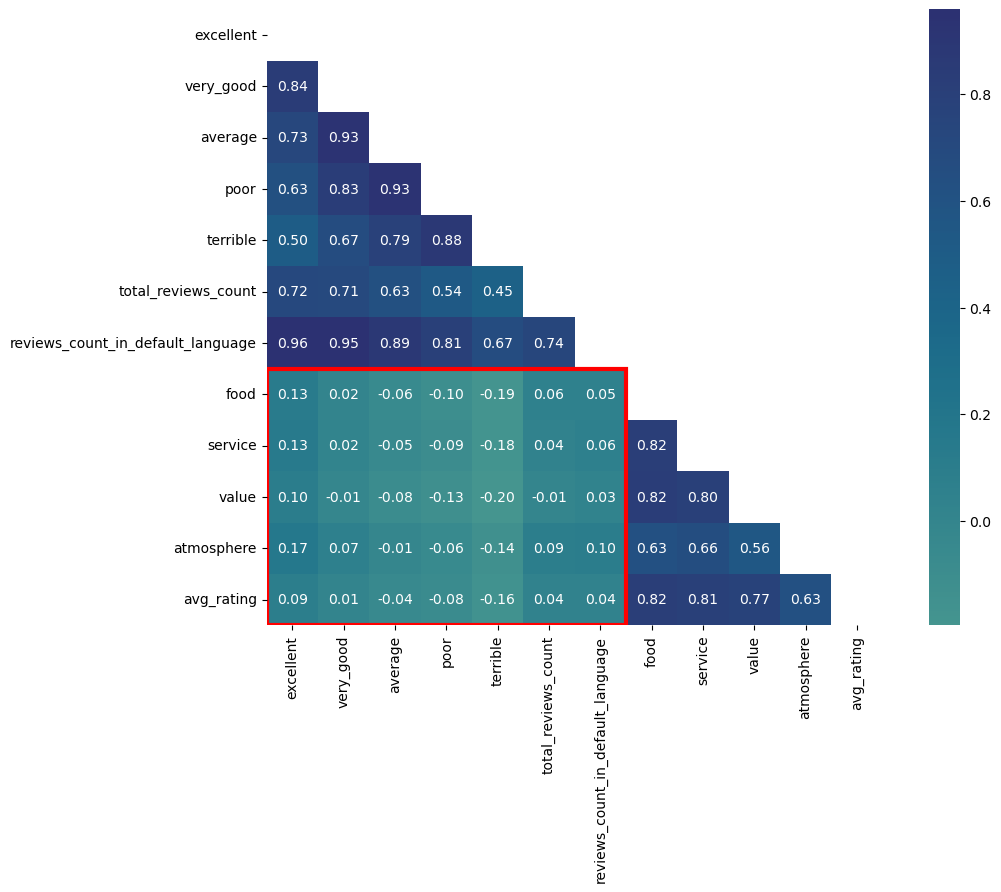

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# correlation matrix
matrix = df[review_columns+rating_columns].corr(method='pearson') # method cand be 'pearson', 'kendall', 'spearman'

# creating a mask to hide upper side
mask = np.triu(np.ones_like(matrix, dtype=bool))

# creating a custom palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=6, center="light", as_cmap=True)
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(matrix, mask=mask, center=0, annot=True, fmt='.2f', square=True, cmap='crest')

# focusing on the correlation between column groups 
ax.add_patch(Rectangle((0, 7), 7.0, 5, edgecolor='red', fill=False, lw=3))

plt.show()

We can see from the above heatmap, the correlation between the review columns and the rating columns are very low. It can be said that there is no significant correlation between them. On the other hand, it looks like these columns have some correlation within themselves, which is expectable. I also tried different correlation methods but nothing changed.

### 2.Are vegetarian-friendly restaurants better than non-vegetarian ones?

#### looking at the data

In order to see which type of restaurant is better, we should look at different metrics. Ratings, review counts, number of positive reviews, number of cuisines are some factors that we can look at.

In [22]:
# percentage of restaurant types in terms of vegan-friendly
df['vegetarian_friendly'].value_counts(normalize=True)

N    0.700925
Y    0.299075
Name: vegetarian_friendly, dtype: Float64

In [23]:
# creating some features for evaluation
# summing the number of positive reviews
df['positive_count'] = df[['excellent', 'very_good']].sum(axis=1)
# summing the number of negative reviews, for me average is a negative thing too :)
df['negative_count'] = df[['average', 'poor', 'terrible']].sum(axis=1)
# positive ratio
df['pos_ratio'] = df['positive_count']/(df['negative_count']+df['positive_count'])
# number of unique cuisines that restaurant serves
df['num_cuisines'] = df['cuisines'].fillna('').str.split(',').apply(set).apply(len)

In [24]:
df.groupby('vegetarian_friendly').agg({'avg_rating':['mean', 'count'], 
                                       'open_days_per_week':'mean',
                                       'total_reviews_count':'mean', 
                                       'excellent':['sum', 'mean'], # intentionally kept
                                       'pos_ratio':'mean',
                                       'food':'mean',
                                       'service':'mean',
                                       'value':'mean',
                                       'atmosphere':'mean',
                                       'num_cuisines':'mean'})

avg_rating         open_days_per_week total_reviews_count  \
                          mean   count               mean                mean   
vegetarian_friendly                                                             
N                     3.967643  663433            6.30834            46.47444   
Y                     4.176086  323328           6.353002          226.332957   

                    excellent            pos_ratio      food   service  \
                          sum       mean      mean      mean      mean   
vegetarian_friendly                                                      
N                     5630913   8.475581  0.757548  3.963376  3.935194   
Y                    18731715  57.843392  0.825349  4.235145  4.191907   

                        value atmosphere num_cuisines  
                         mean       mean         mean  
vegetarian_friendly                                    
N                    3.866922   3.781855     1.924627  
Y                    4.091917   4.032328     2.902666

When we look at the statistics above, we can see that vegetarian friendly restaurants are better than other restaurants. They have better statistics on most of the factors. They not only have a better average rating in general and for food, service, value, and atmosphere, but they also are more available, and serve more cuisines and so on. Also, the number of awards, price range, and popularity features can be included but I wanted to keep it simple. 

#### statistical test on avg. rating

In the above analysis, the comparison is done by looking at population means because the amount of data is high enough (986761 instances for avg. rating column) to make an inference. When we have that much data we can obtain certain results. Let's assume that we do not have that much data and we want to understand whether vegetarian-friendly restaurants are better than non-friendly ones. In this case, we can conduct a t-test to compare the samples obtained from both population. 

In order to make a t-test:
- the data should be distributed normally, as can be seen in the below graph
- the samples should be taken randomly
- variance of the groups should be similar

Let's define the hypothesis:
H0: M0 = M1   # null hypothesis: means are equal
H1: M0 <> M1  # alternative hypothesis: means are not equal

In [25]:
df['avg_rating'].notna().sum()

986761

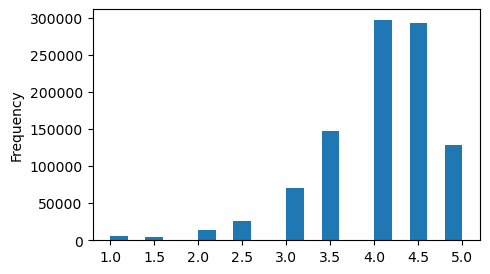

In [26]:
df['avg_rating'].plot(kind='hist', bins=20, figsize=(5,3));

In [27]:
# randomly taking 30 samples from both groups
vf_Y_sample = df[df['vegetarian_friendly']=='Y']['avg_rating'].dropna().sample(30, random_state=1).values
vf_N_sample = df[df['vegetarian_friendly']=='N']['avg_rating'].dropna().sample(30, random_state=1).values

In [28]:
np.mean(vf_Y_sample), np.mean(vf_N_sample)

(4.283333333333333, 3.8)

In [29]:
# t-test
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(list(vf_Y_sample), list(vf_N_sample))
print("T-statistic : ", t_stat)  
print("P-Value     : ", p_value)

T-statistic :  2.476390910917769
P-Value     :  0.016210703030230963


The p-value is less than alpha: 0.0162 < 0.05. So, we can reject the null hypothesis and say that means are not equal statistically. We can conclude that vegetarian-friendly restaurants are better than non-friendly restaurants (since 4.28 > 3.8). Please note that the t-test is conducted when it is not possible to collect population data and the results are valid for up to 30 samples. In our case, the amount of data is enough to make an inferrence about the means.

### 3.Are there any significantly more expensive cuisines?

It is possible to answer this question in different ways. First, by looking at the most expensive restaurants (outliers) and their cuisine type. Alternatively, calculating the average price range for different cuisine types and comparing their averages. I will try different methods and try to compare results.

#### looking at the price-level column

In [30]:
df['price_level'].value_counts()

€€-€€€    537918
€         240205
€€€€       28069
Name: price_level, dtype: Int64

In [31]:
# dropping nulls since it has no meaning in this analysis
df_cuisines = df[['cuisines', 'price_level']].dropna()
# exploding dataframe to find price level for every cuisine types
df_cuisines = (df_cuisines.assign(cuisines = df_cuisines['cuisines'].str.split(',')).explode('cuisines').reset_index(drop=True))
df_cuisines

,cuisines,price_level
0,French,€
1,French,€
2,European,€
3,French,€
4,French,€€-€€€
...,...,...
1937847,Bar,€
1937848,International,€
1937849,European,€
1937850,Pub,€


In [32]:
# creating a pivot table that contains the number of cuisine types for each price levels
df_cuisines_pivot = df_cuisines.groupby(['cuisines', 'price_level']).size().reset_index()
df_cuisines_pivot.rename({0:'count'},axis=1, inplace=True)
df_cuisines_pivot.head()

,cuisines,price_level,count
0,Afghani,€,119
1,Afghani,€€-€€€,271
2,Afghani,€€€€,12
3,African,€,173
4,African,€€-€€€,387


In [33]:
# just looking at counts is not a good idea since some cuisine types are very common and may mislead the results
# so finding percentage of the price levels for each cuisine type will give us a good idea
df_cuisines_pivot = pd.merge(df_cuisines_pivot, df_cuisines_pivot.groupby('cuisines')['count'].sum(), how='left', on='cuisines')
df_cuisines_pivot['perc'] = df_cuisines_pivot['count_x'] / df_cuisines_pivot['count_y']*100
df_cuisines_pivot.rename({'count_x':'count', 'count_y':'total_count'} ,axis=1, inplace=True)
df_cuisines_pivot.sort_values(by=['price_level', 'perc'], ascending=False).head(20)

,cuisines,price_level,count,total_count,perc
251,Kappo,€€€€,2,4,50.000000
374,Shojin,€€€€,1,2,50.000000
508,Beijing cuisine,€€€€,1,3,33.333333
257,Kyoto cuisine,€€€€,2,11,18.181818
668,Japanese Fusion,€€€€,8,46,17.391304
259,Kyushu cuisine,€€€€,1,6,16.666667
671,Japanese sweets parlour,€€€€,1,6,16.666667
248,Kaiseki,€€€€,2,13,15.384615
490,Azerbaijani,€€€€,1,7,14.285714
554,Central European,€€€€,86,612,14.052288


Now, we can make some inferences:
50% of the restaurants that offer 'Kappo' and 'Shojin' cuisine are very expensive. 'Beijing', 'Kyoto', 'Japanese Fusion' are other examples of them. They are unique and expensive, maybe there may be a correlation between uniqueness and expensiveness.

#### lookig at the outliers for price range

Alternatively, we can look at the most expensive restaurants and their cuisine types. 
When we look at the value counts, the most common price ranges, there are cheaper ones but there are some outliers as well.

In [34]:
df['price_range'].value_counts()

€10-€30      5937
€5-€15       5810
€10-€20      5148
€5-€20       4793
€10-€25      4448
             ... 
€118-€304       1
€33-€215        1
€75-€354        1
€115-€299       1
€35-€180        1
Name: price_range, Length: 7298, dtype: Int64

In [35]:
# this function finds the average of the range and returns '-' if the range is unknown
def find_avg_price_range(txt):
    if type(txt) == pd._libs.missing.NAType:
        return '-'
    nums = re.findall('\d+', txt.replace(',',''))        
    return sum([float(i) for i in nums])/2

In [36]:
# this function finds the maximum of the range and returns '-' if the range is unknown
def find_max_price_range(txt):
    if type(txt) == pd._libs.missing.NAType:
        return '-'
    nums = re.findall('\d+', txt.replace(',',''))
    return max([float(i) for i in nums])

In [37]:
# the average of range and maximum of range are found to find outliers
df['avg_price_range'] = df['price_range'].apply(find_avg_price_range)
df['max_price_range'] = df['price_range'].apply(find_max_price_range)

there are CHF values in the data but I assume 1 CHF = 1 EUR, since EUR/CHF ratio is so close to 1.

In [38]:
# the maximum of upper limits of the price ranges
df['max_price_range'][df['max_price_range']!='-'].max()
# € 745 M  looks too much to me, it can be a mistake but let's assume that it is not since I don't know much about how this data is obtained

745153984.0

<AxesSubplot:title={'center':'Histogram for avg. price ranges'}, xlabel='avg_price_range', ylabel='Count'>

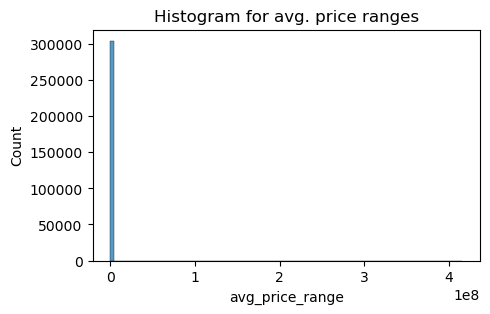

In [39]:
plt.figure(figsize=(5,3))
plt.title('Histogram for avg. price ranges')
sns.histplot(df['avg_price_range'][df['avg_price_range']!='-'], bins=100)
# it is not possible to see anything here

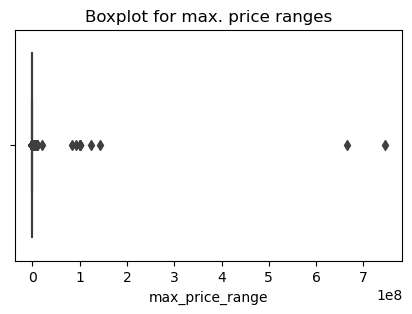

In [40]:
plt.figure(figsize=(5,3))
plt.title('Boxplot for max. price ranges')
sns.boxplot(x=df['max_price_range'][df['max_price_range']!='-']);

From both plots, we can see that there are outliers in the data because the x ranges go up to high values and even the real distribution is not seen. There are a lot of methods to detect outliers in the literature such as isolation forest, clustering, etc. but I will use the interquartile range method to detect outliers. Also, I will go with the maximum of the price range because the average of the range can be tricky (I don't know much about how this data was obtained and a can of cola can be cheaper and the average drops greatly).  

In [41]:
# getting the data that contain figures
max_of_price_ranges = df['max_price_range'][df['max_price_range']!='-']

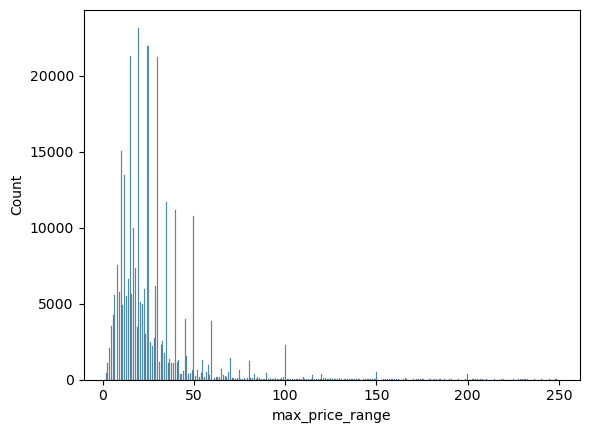

In [42]:
# let's focus on the affordable range to see the distribution of the data
sns.histplot(max_of_price_ranges[max_of_price_ranges<250]);

#### IQ-range

In [43]:
def detect_outlier_limits(data, k=1.5):    
    Q1 = np.percentile(data, 25, interpolation = 'midpoint')
    Q3 = np.percentile(data, 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    lower_limit = Q1 - k*IQR
    upper_limit = Q3 + k*IQR
    return lower_limit, upper_limit

In [44]:
max_lower_limit, max_upper_limit = detect_outlier_limits(max_of_price_ranges)
print(max_lower_limit, max_upper_limit)
# we can consider any max price range outside of this interval as outlier

-12.0 60.0


C:\Users\IsmailKaraman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


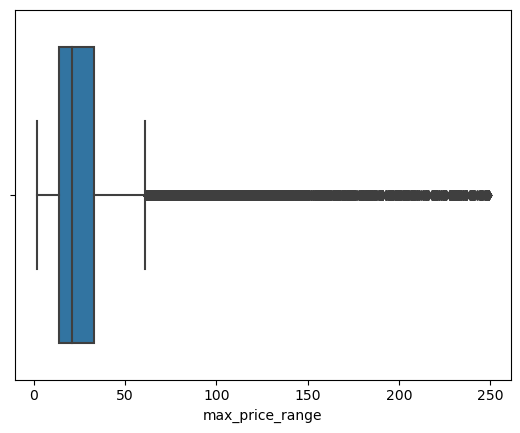

In [45]:
# boxplot of the max of price range
sns.boxplot(max_of_price_ranges[max_of_price_ranges<250]);

In [46]:
# finding the cuisines of the restaurants which are outliers in terms of their price range
outlier_cuisines = df[df['max_price_range'].replace({'-':0})>max_upper_limit].dropna().cuisines
outlier_cuisine_list = []
for i in outlier_cuisines.str.split(',').values:
    outlier_cuisine_list.extend(i)
    
# counting the cuisine types of the restaurants that showed up as outlier
from collections import Counter
Counter(outlier_cuisine_list).most_common(10)
# the most frequent cuisines of the outlier restaurants

[(' European', 69),
 (' Mediterranean', 41),
 (' British', 38),
 ('Seafood', 30),
 ('French', 26),
 (' Healthy', 26),
 ('European', 23),
 (' Contemporary', 20),
 (' Seafood', 16),
 (' Greek', 16)]

#### looking at the price levels

with the same logic with the first method, let's do the analysis with price ranges instead of price levels. since there is no upper limit for the highest price level, I will calculate the average upper limit of the price range for each cuisines and find the ones that have highest average price range.

In [47]:
# dropping nulls since it has no meaning in this analysis
df_cuisines = df[['cuisines', 'max_price_range']].replace({'-': np.nan}).dropna()
# exploding dataframe to find price level for every cuisine types
df_cuisines = (df_cuisines.assign(cuisines = df_cuisines['cuisines'].str.split(',')).explode('cuisines').reset_index(drop=True))
df_cuisines

,cuisines,max_price_range
0,French,29.0
1,French,17.0
2,European,17.0
3,French,35.0
4,European,35.0
...,...,...
853699,Bar,8.0
853700,International,8.0
853701,European,8.0
853702,Pub,8.0


In [48]:
# creating a pivot table that contains the average max price range for each cuisine type
df_cuisines_pivot = df_cuisines.groupby(['cuisines']).agg({'max_price_range':['mean','count']}).reset_index()
df_cuisines_pivot.sort_values(by=('max_price_range',  'mean'), ascending=False).head(20)

cuisines max_price_range       
                                  mean  count
2             Albanian   558699.905028    179
0              Afghani   384506.631179    263
16         Bangladeshi    86926.075586   1151
18            Barbecue    70704.570253  10690
174           Barbecue    69979.739161   1430
154           Xinjiang    67902.823529     17
284            Spanish    66521.244884  10164
147             Tuscan    35971.878548   2783
98      Middle Eastern    26837.961559   3772
227             Indian    15576.251088   6436
9                Asian    14759.725843  14944
232            Italian    14133.380297  71999
81     Japanese Fusion    13287.376159    755
276            Seafood    13278.078091   7709
133   Southern-Italian    11049.823965   8504
92            Ligurian    10527.323899    954
179           Brew Pub     5988.369928   1676
173                Bar     5701.584381  16313
96       Mediterranean     5429.895141  56533
247      Mediterranean     5103.649735  20356

From above table, now we see different cuisines, 'Albanian', 'Afghani', 'Bangladeshi' cuisines are the most expensive cuisines according to their average maximum of price range. In my opinion, these analysis may give opinion but in order to find realistic results, the effect of the restaurants should be purified from the analysis. Also, it is a question that the given price ranges includes the total bill or menu items. 

# Business-specific

### 1

In [49]:
cities = pd.read_csv('assets/europe_capitals_population_and_area.csv', sep=';')
cities['Area in km2 '] = cities['Area in km2 '].str.replace(',', '.').astype(float)
cities = cities.convert_dtypes()
cities.head()

,CityNo,City,Country,Population,Area in km2
0,1,Amsterdam,Netherland,851573,219.32
1,2,Athens,Greece,664046,2929.0
2,4,Barcelona,Spain,1620809,101.4
3,4,Berlin,Germany,3711930,891.7
4,5,Bratislava,Slovakia,424428,367.6


In order to find that, we need to find the number of gluten free restaurants per person for each capitals and find the cities that has least density for gluten-free restaurants. First, from the original dataframe we need to find the number of restaurants and integrate it with the population data. 

In [50]:
df['gluten_free'].value_counts()

N    959900
Y    123497
Name: gluten_free, dtype: Int64

In [51]:
# assigning a flag for cities to not miss any city that has no gluten-free restaurant
df['gluten_free_flag'] = 0
df.loc[df['gluten_free']=='Y', 'gluten_free_flag'] = 1
df['gluten_free_flag'].sum()

123497

In [52]:
# number of gluten-free restaurants for each city
gluten_free_counts = df.groupby('city')['gluten_free_flag'].sum().reset_index()
gluten_free_counts.columns = ['City', 'Count']
gluten_free_counts

,City,Count
0,'s Gravendeel,0
1,'s Gravenmoer,0
2,'s Gravenpolder,0
3,'s-Graveland,3
4,'s-Gravenzande,2
...,...,...
43490,Zwolle,32
43491,Zwonitz,1
43492,d'Erdre-Auxence,0
43493,l'Eguille sur Seudre,0


In [53]:
# joining counts and cities dataframes
df_gf_density = pd.merge(cities, gluten_free_counts, how='left', on='City')
# finding gluten-free restaurant density
df_gf_density['density_population'] = df_gf_density['Count']/df_gf_density['Population']
df_gf_density['density_area'] = df_gf_density['Count']/df_gf_density['Area in km2 ']
df_gf_density

,CityNo,City,Country,Population,Area in km2,Count,density_population,density_area
0,1,Amsterdam,Netherland,851573,219.32,622.0,0.00073,2.836039
1,2,Athens,Greece,664046,2929.0,271.0,0.000408,0.092523
2,4,Barcelona,Spain,1620809,101.4,NaN,NaN,NaN
3,4,Berlin,Germany,3711930,891.7,NaN,NaN,NaN
4,5,Bratislava,Slovakia,424428,367.6,67.0,0.000158,0.182263
5,6,Brussels,Belgium,1191604,161.38,NaN,NaN,NaN
6,7,Budapest,Hungary,1779361,525.2,433.0,0.000243,0.824448
7,8,Copenhagen,Denmark,602481,88.25,251.0,0.000417,2.844193
8,9,Dublin,Ireland,527612,115.0,596.0,0.00113,5.182609
9,10,Edinburgh,Scotland,482005,264.0,NaN,NaN,NaN


In [54]:
# the density of restaurants 
df_gf_density.sort_values('density_population').head(10)

,CityNo,City,Country,Population,Area in km2,Count,density_population,density_area
30,31,Zurich,Switzerland,409241,87.93,0.0,0.0,0.0
18,19,Lyon,France,506615,47.87,54.0,0.000107,1.128055
4,5,Bratislava,Slovakia,424428,367.6,67.0,0.000158,0.182263
21,22,Munich,Germany,1456039,310.43,256.0,0.000176,0.824663
28,29,Vienna,Austria,1889083,414.6,413.0,0.000219,0.996141
6,7,Budapest,Hungary,1779361,525.2,433.0,0.000243,0.824448
24,25,Paris,France,2206488,105.4,582.0,0.000264,5.521822
25,26,Prague,Czech,1301132,298.0,389.0,0.000299,1.305369
12,13,Helsinki,Finland,631695,184.5,199.0,0.000315,1.078591
27,28,Stockholm,Sweden,952058,188.0,366.0,0.000384,1.946809


In [55]:
df_gf_density.sort_values('density_area').head(10)

,CityNo,City,Country,Population,Area in km2,Count,density_population,density_area
30,31,Zurich,Switzerland,409241,87.93,0.0,0.0,0.0
1,2,Athens,Greece,664046,2929.0,271.0,0.000408,0.092523
4,5,Bratislava,Slovakia,424428,367.6,67.0,0.000158,0.182263
6,7,Budapest,Hungary,1779361,525.2,433.0,0.000243,0.824448
21,22,Munich,Germany,1456039,310.43,256.0,0.000176,0.824663
28,29,Vienna,Austria,1889083,414.6,413.0,0.000219,0.996141
12,13,Helsinki,Finland,631695,184.5,199.0,0.000315,1.078591
18,19,Lyon,France,506615,47.87,54.0,0.000107,1.128055
26,27,Rome,Italy,2868782,1285.0,1654.0,0.000577,1.28716
25,26,Prague,Czech,1301132,298.0,389.0,0.000299,1.305369


There are some cities that NaN values for counts, it looks like there is no information for these cities. So, it is not true to make a comment about them, and let's ignore them and look at the rest of the data. Zurich has not gluten-free restaurants and so it would be a good idea to start from there. 

Lyon, Bratislava, Munich and Vienna are the other capitals that have the lowest density of gluten-free restaurants in terms of population. Bratislava and Munich are also in top-5 in terms of area density, so these will be the other cities. I would prefer Lyon as the fourth place since its density for the population is so low and finally, I would choose Athens because the density for area is so low. It may be a good opportunity to find some distinct that have no gluten-free restaurants. 

1. Zurich
2. Bratislava
3. Munich 
4. Lyon
5. Athens

### 2.

I would consider openning a some certain number of restaurants in each capital to increase reputation. It will also increase recognition and everybody should be able to reach gluten-free or vegetarian restaurants since it is very important for some people in terms of health and eating preferences. 

From the population data, they can predict their number of potential customers and this dataset can be extended in terms of age, socio-economic status, eating habbits and etc. So, for example while deciding to open an expensive restaurant, population is not the only criterion. Also, the socio-economic status and eating habbits of the people are important. 

The cuisines are important too. Sometimes, considering openning a restaurant to low-density areas may result in a threat rather than an opportunity. Eating habbits of people may be more important than the numbers. 

# Bonus

In [56]:
# reading json data
import json
with open('assets/paris_bounding_polygon.json') as f:
    paris_bp = json.load(f)
paris_city_borders = np.array(paris_bp)

In [57]:
# finding italian restaurans that located in paris and dropping the nulls
df['is_italian'] = df['cuisines'].fillna('').apply(lambda x: 1 if 'italian' in x.lower() else 0)
paris_restaurants = df[(df['city']=='Paris')&(df['is_italian']==1)][['longitude','latitude']].dropna()
paris_restaurants.shape

(1725, 2)

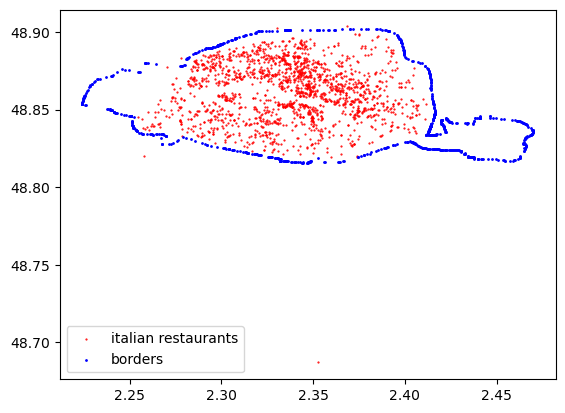

In [58]:
plt.scatter(x=paris_restaurants['longitude'], y=paris_restaurants['latitude'], s=0.3, c='r')
plt.scatter(x=paris_city_borders[:,0], y=paris_city_borders[:,1], s=1, c='b',)
plt.legend(['italian restaurants', 'borders'])
plt.show()

from the above scatter plot, we can clearly see that there are areas that do not have any restaurants with the given assumption.

In order to find the areas that have low density, different algorithms may be implemented. I believe that there are solutions to solve this problem on the internet but I found this problem very (x5) interesting and will try to suggest and implement my ideas.

1. Divide the area into grids and calculate the density of the grids and choose the sparse one as the candidate area.
2. a KNN and SMOTE-based oversampling heuristic
    - create new dummy points using SMOTE logic with the border points.
        they will be inside of the borders if the area is convex (it is not in this case but can be checked)
        if the number of created points is high enough, then it will cover all the areas of the city
    - calculate the avg. distance to k-neighbors (k can be any number)
    - if the avg. distance is greater than a threshold propose the point as an alternative location
    - the threshold can be calculated by averaging the avg. distance of the existing points to its k-neighbors
3. clustering based oversampling
    - apply a clustering (ex: k_means) and cluster the restaurants
    - after finding the best solution (with different initialization and k) calculate the density of each cluster
    - the low density clusters are the candidate areas
4. a circle creation heuristic
    - it will search for empty areas
    - pick a random point inside the city
    - try to expand it until touch a point of the restaurants and borders
    - it will try to find the biggest circle that is empty
    - a mechanism can be developed to improve random point picking
    - a revision to make convert the circle to a polygon
5. a search heuristic
    - for each of the border and restaurant points creates a circle and count the number of existing restaurants in the area
    - propose the areas that have the lowest density as the candidate areas
    - convert the circle to a polygon to remove the overflowing areas from the border
    - the diameter of the circle is a parameter should be optimized

## Implementation

## solution 1

In [59]:
def plot_grids(rests, city_borders, grid_size):   
    
    longs = city_borders[:,0]
    latds = city_borders[:,1]
    
    plt.scatter(x=rests['longitude'], y=rests['latitude'], s=0.3, c='r')
    plt.scatter(x=city_borders[:,0], y=city_borders[:,1], s=1, c='b',)

    for y in np.linspace(min(latds), max(latds), grid_size):
        plt.plot([min(longs), max(longs)], [y, y], 'k-', color = 'g')

    for x in np.linspace(min(longs), max(longs), grid_size):
        plt.plot([x, x], [min(latds), max(latds)], 'k-', color = 'g')

    plt.legend(['italian restaurants', 'borders'])
    plt.title('Grids')
    plt.show()

In [60]:
def plot_density_graph(rests, city_borders, densities, dens_threshold):
    
    plt.scatter(x=rests['longitude'], y=rests['latitude'], s=0.3, c='r')
    plt.scatter(x=city_borders[:,0], y=city_borders[:,1], s=1, c='b',)

    for area in densities:
        if area == np.inf:
            continue
        count, poly = area
        try:
            x,y = poly.exterior.xy
            plt.plot(x,y)
            if count < dens_threshold: # if the number of restaurant is less than given number fill the area
                plt.fill(x,y)
            plt.annotate(count, (np.mean(x), np.mean(y)))
        except:
            pass

    plt.legend(['italian restaurants', 'borders'])
    plt.title('Restaurant Densities')
    plt.show()

In [61]:
def calculate_number_of_restaurants(intersection_area, all_restaurants):
    
    density = 0
    # find the number of restaurants in the given area
    for point in all_restaurants:
        if intersection_area.contains(point):
            density += 1
            
    return density

In [62]:
def calculate_density(corners, city, restaurants):
    
    # unpack corners
    (x0, y0), (x1, y1) = corners
    rectangle = Polygon([(x0, y0), (x0, y1), (x1,y1), (x1, y0)])
    
    # if the intersection area is positive return the intersection
    if rectangle.intersection(city).area >0:
        
        intersection_area = rectangle.intersection(city)
        
        return calculate_number_of_restaurants(intersection_area, restaurants), intersection_area
    else:
        return np.inf

In [63]:
def find_grid_densities(city_borders, restaurants, grid_size, dens_threshold):

    longs = city_borders[:,0]
    latds = city_borders[:,1]
    
    # plotting initial grids
    plot_grids(restaurants, city_borders, grid_size)
        
    # find borders of the grids    
    longs_space = np.linspace(min(longs), max(longs), grid_size)
    latds_space = np.linspace(min(latds), max(latds), grid_size)
    all_corners = []
    for i in range(grid_size-1):
        for j in range(grid_size-1):
            all_corners.append(((longs_space[i], latds_space[j]), (longs_space[i+1], latds_space[j+1])))
        
    # create restaurant points as shapely points
    restaurants_points = []
    for x, y in restaurants.values:
        restaurants_points.append(Point(x, y))

    # create shapely polygon using the city borders
    city = Polygon([tuple(i) for i in city_borders])
    
    # find intersection and calculate density for each rectangle
    densities = []
    for corner in all_corners:
        densities.append(calculate_density(corner, city, restaurants_points))
    
    plot_density_graph(restaurants, city_borders, densities, dens_threshold)
    
    suggested_areas = []
    for area in densities:
        if area == np.inf:
            continue
        count, poly = area
        if count < dens_threshold:
            try:
                x,y = poly.exterior.xy
                suggested_areas.append(((x, y), count))
            except:
                pass

    return suggested_areas

In [64]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

C:\Users\IsmailKaraman\AppData\Local\Temp\ipykernel_11008\2635971379.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([min(longs), max(longs)], [y, y], 'k-', color = 'g')
C:\Users\IsmailKaraman\AppData\Local\Temp\ipykernel_11008\2635971379.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([x, x], [min(latds), max(latds)], 'k-', color = 'g')


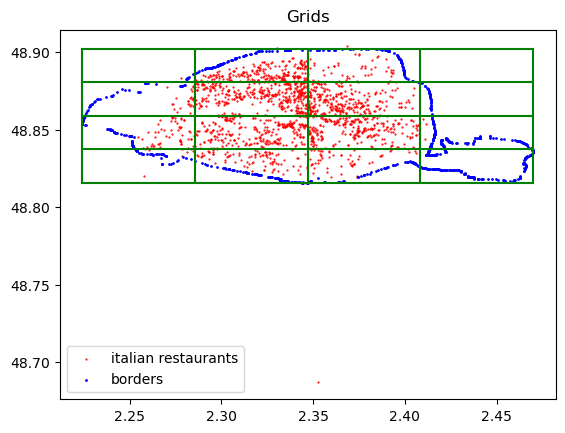

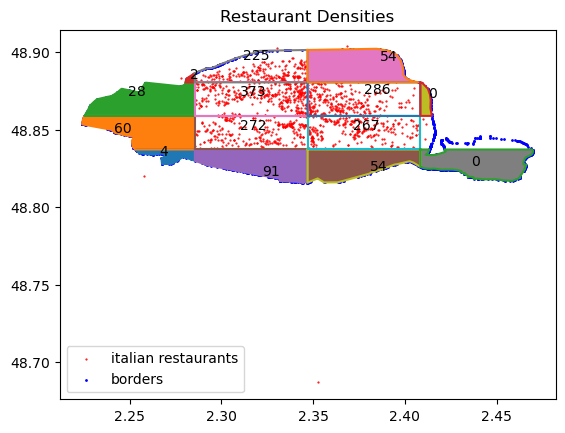

In [65]:
grid_size = 5
dens_threshold = 100
suggested_areas = find_grid_densities(paris_city_borders, paris_restaurants, grid_size, dens_threshold)

C:\Users\IsmailKaraman\AppData\Local\Temp\ipykernel_11008\2635971379.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([min(longs), max(longs)], [y, y], 'k-', color = 'g')
C:\Users\IsmailKaraman\AppData\Local\Temp\ipykernel_11008\2635971379.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([x, x], [min(latds), max(latds)], 'k-', color = 'g')


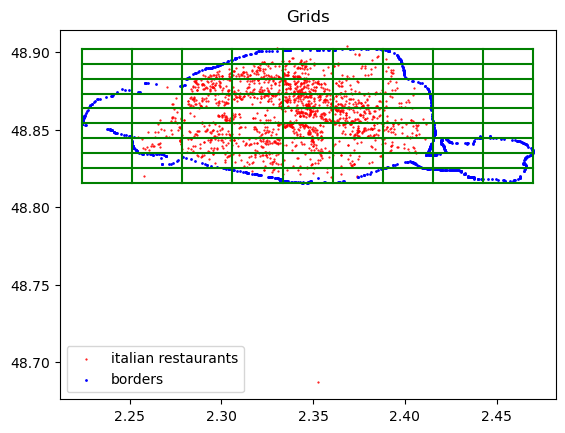

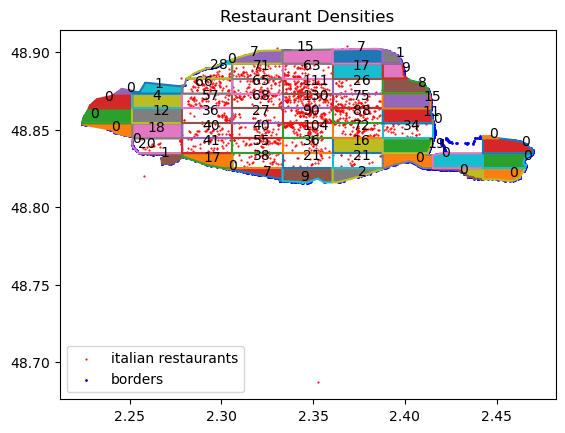

In [66]:
grid_size = 10
dens_threshold = 20
suggested_areas = find_grid_densities(paris_city_borders, paris_restaurants, grid_size, dens_threshold)

In [67]:
# printing the low density areas
for coords, dens in suggested_areas:
    if dens < 1:
        print(dens)
        print(coords)
        print('-'*20)

0
(array('d', [2.2514150444444447, 2.2514061, 2.2513016, 2.2512996, 2.251272, 2.2512194, 2.2514150444444447, 2.2514150444444447]), array('d', [48.84107110301752, 48.8411522, 48.8420892, 48.8421089, 48.8423976, 48.8428913, 48.843289518303735, 48.84107110301752]))
--------------------
0
(array('d', [2.2514150444444447, 2.2514150444444447, 2.2509426, 2.2509157, 2.250872, 2.2508284, 2.2506759, 2.2505438, 2.2504945, 2.2504219, 2.2497544, 2.2478828, 2.2467289, 2.245559, 2.2430007, 2.2424666, 2.242352, 2.2420888, 2.2415952, 2.2415171, 2.2415047, 2.2414248, 2.2403097, 2.2401177, 2.2399503, 2.2396971, 2.239558, 2.2393244, 2.239084, 2.2381442, 2.2377999, 2.2263608, 2.2255595, 2.2241686, 2.2241606, 2.2241429, 2.2241349, 2.224129, 2.2241249, 2.2241249, 2.2241242996275608, 2.2514150444444447]), array('d', [48.85405572222222, 48.84559117361242, 48.8456004, 48.8456, 48.8456004, 48.8456087, 48.8456267, 48.8456557, 48.8456704, 48.845688, 48.8458481, 48.8463268, 48.8466377, 48.846937, 48.8475951, 48.847

## solution 2

In [112]:
def create_new_random_point(p1, p2):
    
    k = np.random.rand(1)
    p_new = (p2-p1)*k + p1
    
    return p_new

In [113]:
def calculate_distance_between_points(p1, p2):
    
    # calculating euclidean distance between two points
    x1, y1 = p1
    x2, y2 = p2
    
    return ((x2-x1)**2 + (y2-y1)**2)**0.5

In [136]:
def find_nearest_neihbors(p_new, restaurants, k):
    
    distances = []
    # calculate distances to each restaurant
    for rest in restaurants:
        distances.append((calculate_distance_between_points(p_new, rest), rest))
    # find the nearest k restaurants    
    nearest_neighbors = sorted(distances, key=lambda x: x[0])
    
    return nearest_neighbors[:k]

In [168]:
def check_point_eligibility(p_new, restaurants, k, distance_threshold):
    
    nearest_neighbors = find_nearest_neihbors(p_new, restaurants, k)
    avg_distance = sum([d for d, _ in nearest_neighbors])/len(nearest_neighbors)
    
    if avg_distance > distance_threshold:   
        return True
    else:
        return False

In [169]:
def find_new_points(city_borders, restaurants, num_of_new_point, k, distance_threshold):
    
    num_iter = 0
    alternative_points = []
    
    # if a stopping condition met or a certain of iteration is reached
    while True and num_iter < 1000:
        
        num_iter += 1      
        
        # creating new point as a linear combination of two border points
        a, b = np.random.choice(range(len(city_borders)), size=2, replace=False)
        p1, p2 = city_borders[a], city_borders[b]
        p_new = create_new_random_point(p1, p2)

        # converting borders to a shapely polygon
        city = Polygon([tuple(i) for i in city_borders])

        # check the new created point is inside of the city
        if city.contains(Point(p_new)):
            # if the new point has a some level of avg. distance to its neighbors
            if check_point_eligibility(p_new, restaurants, k, distance_threshold):
                
                alternative_points.append(p_new)
                
                # if enough point is find, stop the algorithm
                if len(alternative_points) >= num_of_new_point:
                    
                    return np.array(alternative_points)

In [170]:
def calculate_avg_distance_for_sets(point_set):
    
    from itertools import combinations
  
    comb = combinations(point_set, 2)
    distances = []
    for p1, p2 in list(comb):
        distances.append(calculate_distance_between_points(p1, p2))
    
    return sum(distances)/len(distances)

In [175]:
def plot_new_points(rests, city_borders, new_points):   
    
    longs = city_borders[:,0]
    latds = city_borders[:,1]
    
    plt.scatter(x=rests['longitude'], y=rests['latitude'], s=0.3, c='r')
    plt.scatter(x=city_borders[:,0], y=city_borders[:,1], s=1, c='b',)
    plt.scatter(x=new_points[:,0], y=new_points[:,1], marker='x',s=20, c='g',)
    
    plt.legend(['italian restaurants', 'borders', 'new alternatives'])
    plt.title('Grids')
    plt.show()

In [172]:
k = 5
distance_threshold = calculate_avg_distance_for_sets(paris_restaurants.values)
num_of_new_point = 20

In [173]:
new_points = find_new_points(paris_city_borders, paris_restaurants.values, num_of_new_point, k, distance_threshold)

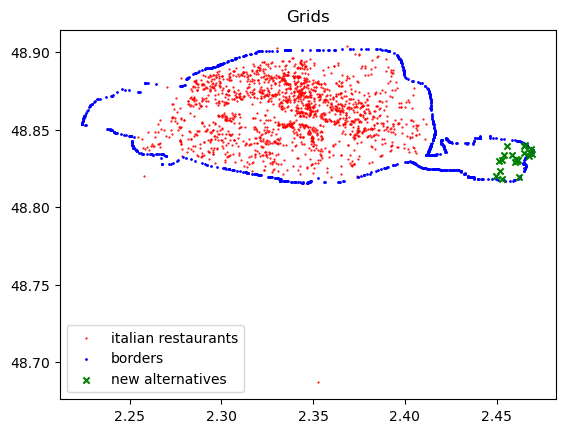

In [176]:
plot_new_points(paris_restaurants, paris_city_borders, new_points)

this is a heuristic algorithm and finds new points randomly. it can be considered as a base point and can be improved a lot.